<a href="https://colab.research.google.com/github/amadeu100401/Clusterizacao_Machine_Learning/blob/main/Atividade_clusteriza%C3%A7%C3%A3o_Indices_Criminais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Criminais

O objetivo dessa tarefa é construir um mapa do crime no Brasil a partir de dados abertos. O trabalho pode ser feito em dupla ou individual. Cada dupla ou pessoa deve fazer uma análise e pré-processamento dos dados para que possam construir um mapa do crime do Brasil. Além disso, vocês devem aplicar algoritmos de de clusterização para agrupar cidades de acordo com o nível de criminalidade (como o exemplo dos Estados Unidos que apresentei em sala de aula).

A base que vocês devem utilizar está disponível neste link:

http://dados.mj.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica

A base contém dados de crimes cometidos nos estados brasileiros. Na página vocês vão encontrar os dados por estado e por município. No entanto, para esse trabalho vamos usar apenas a base de estados. O nome do arquivo é `indicadoressegurancapublicauf.xlxs` e pode ser acessados no link acima onde tem **Dados Nacionais de Segurança Pública - UF**. No link também tem o arquivo **Dicionário de Dados - UF** que explica a tabela que vocês vão trabalhar. Além disso, o link contém outras informações relacionadas ao tema. Importante a leitura para ajudar na análise de vocês. 

O trabalho deve conter as seguintes tarefas

* pré-processamento e análise dos dados;
* aplicação dos algoritmos de clusterização e análise dos resultados;
* visualização dos resultados da análise e da clusterização. 

Para as etapas 1 e 3 vocês podem usar qualquer ferramenta: excel, power bi .... Para a etapa 2, utilizem os algoritmos de clusterização apresentados em sala de aula através da biblioteca **scikit-learn**. No material de aula mostro como construir uma tabela com os dados da clusterização. Essa saída pode ser usada nas ferramentas que vocês escolherem. Na etapa de clusterização vocês devem gerar o cluster e fazer a análise dos resultados. Variem parâmetros relacionados aos algoritmos de cluster para encontrar o melhor agrupamento. Essa análise deve ser feita também utilizando as métricas de avaliação não-supervisionadas vistas em sala de aula.

A seguir mostro como fazer a leitura do arquivo.

Bom trabalho ;) 

# Vizualização dos dados
A vizualisação dos dados antes e depois da cluterização poderá ser feita por meio do dashboard feito utilizando o Power Bi .O quadro estará disponível junto com esse notebook no mesmo repositório no GitHub. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports necessários
import pandas as pd
from sklearn import preprocessing
from scipy.spatial import distance_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform
from sklearn import metrics

## Carregando a base do Excel 

O arquivo de entrar é um `.xlsx` que possui duas planilhas. A primeira com as ocorrências criminais e a segunda com o número de vítimas de diferentes registros criminais. Cada planilha foi salva em um DataFrame distinto. Vocês devem analisar a melhor forma de utilizar esses dados durante a etapa de pré-processamento ;) 

In [3]:
#carregamento de dados e fazendo algumas transformações
data_ocorrencias = pd.read_excel("/content/drive/MyDrive/Atividade/indicadoressegurancapublicauf.xlsx",sheet_name='Ocorrências')
data_vitimas = pd.read_excel("/content/drive/MyDrive/Atividade/indicadoressegurancapublicauf.xlsx",sheet_name='Vítimas')

#Ajustando nome da coluna
data_ocorrencias.columns = data_ocorrencias.columns.str.replace('Tipo Crime', 'Tipo_Crime')

In [4]:
# Fazendo agrupamento das Unidades federativas por tipo de crime
ocorrenciasCrime = data_ocorrencias.groupby(['UF','Tipo_Crime']).sum()
ocorrenciasCrime

Ano  Ocorrências
UF        Tipo_Crime                                              
Acre      Estupro                              171534         1525
          Furto de veículo                     171534         2769
          Homicídio doloso                     171534         1971
          Lesão corporal seguida de morte      167496            8
          Roubo a instituição financeira       169515           13
...                                               ...          ...
Tocantins Roubo a instituição financeira       171534           93
          Roubo de carga                       131126           41
          Roubo de veículo                     171534         5160
          Roubo seguido de morte (latrocínio)  171534           94
          Tentativa de homicídio               171534         2801

[243 rows x 2 columns]

In [5]:
# Criando lista com os estados
uf = list(data_ocorrencias.UF.unique())
uf

['Acre',
 'Amapá',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Distrito Federal',
 'Espírito Santo',
 'Goiás',
 'Maranhão',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Pará',
 'Paraíba',
 'Paraná',
 'Pernambuco',
 'Piauí',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rondônia',
 'Roraima',
 'Santa Catarina',
 'São Paulo',
 'Sergipe',
 'Tocantins',
 'Alagoas',
 'Rio de Janeiro']

In [6]:
# criando novo DataFrame utilizando a soma de ocorrências por crime
matriz = []

for uf in uf:
  linha = [uf]
  for i in range(9):
    df = ocorrenciasCrime.query(f"UF == '{uf}'")
    # print(df.Ocorrências[0])
    linha.append(df.Ocorrências[i])
  matriz.append(linha)
matriz = pd.DataFrame(matriz, columns=['UF','Estupro',	'Furto_de_veículo',	'Homicídio_doloso'	,'Lesão_corporal_seguida_de_morte'	,'Roubo_a_instituição_financeira',	'Roubo_de_carga',	'Roubo_de_veículo',	'Roubo_seguido_de_morte_(latrocínio)',	'Tentativa_de_homicídio'	 ])
matriz = pd.DataFrame(matriz).set_index('UF')
matriz

,Estupro,Furto_de_veículo,Homicídio_doloso,Lesão_corporal_seguida_de_morte,Roubo_a_instituição_financeira,Roubo_de_carga,Roubo_de_veículo,Roubo_seguido_de_morte_(latrocínio),Tentativa_de_homicídio
UF,,,,,,,,,
Acre,1525,2769,1971,8,13,8,5118,88,725
Amapá,2451,4229,1817,117,66,43,2303,140,1507
Amazonas,5945,16137,7776,167,97,78,20753,445,1960
Bahia,20205,36069,37985,595,147,2304,89754,1103,17640
Ceará,11589,32146,24965,220,248,1244,62155,417,8863
Distrito Federal,4497,37503,3101,40,20,317,27072,227,5505
Espírito Santo,4803,31191,8249,96,170,547,28801,279,16871
Goiás,4512,65622,13850,274,300,2530,56441,513,14674
Maranhão,8633,18128,12726,182,422,312,27166,650,7265


In [7]:
del data_vitimas["Ano"]
del data_vitimas["Mês"]

In [8]:
# Executando um merge com DF_vítimas para add coluna Vítimas

df_vit = data_vitimas.groupby(['UF'])
df_vit = df_vit.agg('sum')

df = matriz.merge(df_vit, how='inner', on='UF')
df

,Estupro,Furto_de_veículo,Homicídio_doloso,Lesão_corporal_seguida_de_morte,Roubo_a_instituição_financeira,Roubo_de_carga,Roubo_de_veículo,Roubo_seguido_de_morte_(latrocínio),Tentativa_de_homicídio,Vítimas
UF,,,,,,,,,,
Acre,1525,2769,1971,8,13,8,5118,88,725,1993
Amapá,2451,4229,1817,117,66,43,2303,140,1507,2132
Amazonas,5945,16137,7776,167,97,78,20753,445,1960,8684
Bahia,20205,36069,37985,595,147,2304,89754,1103,17640,41903
Ceará,11589,32146,24965,220,248,1244,62155,417,8863,26890
Distrito Federal,4497,37503,3101,40,20,317,27072,227,5505,3767
Espírito Santo,4803,31191,8249,96,170,547,28801,279,16871,8697
Goiás,4512,65622,13850,274,300,2530,56441,513,14674,14831
Maranhão,8633,18128,12726,182,422,312,27166,650,7265,13565


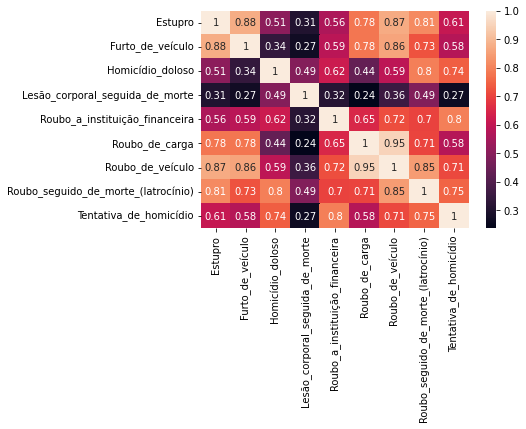

In [9]:
#Gerando um mapa de correlação entre tipos de crimes
columns = ['Estupro',
'Furto_de_veículo',
'Homicídio_doloso',
'Lesão_corporal_seguida_de_morte',
'Roubo_a_instituição_financeira',
'Roubo_de_carga',
'Roubo_de_veículo',
'Roubo_seguido_de_morte_(latrocínio)',
'Tentativa_de_homicídio']

df_corr = df[columns].corr()
sns.heatmap(df_corr, xticklabels=columns, yticklabels=columns, annot=True)

In [10]:
# Fazendo a normalização dos dados 
x = df[columns].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled, index=df.index, columns=columns)
df_norm.head()

,Estupro,Furto_de_veículo,Homicídio_doloso,Lesão_corporal_seguida_de_morte,Roubo_a_instituição_financeira,Roubo_de_carga,Roubo_de_veículo,Roubo_seguido_de_morte_(latrocínio),Tentativa_de_homicídio
UF,,,,,,,,,
Acre,0.000000,0.000000,0.018451,0.000000,0.000000,0.000086,0.007128,0.000567,0.000000
Amapá,0.012160,0.002219,0.014254,0.099817,0.103516,0.000689,0.000000,0.030062,0.030891
Amazonas,0.058041,0.020320,0.176665,0.145604,0.164062,0.001291,0.046716,0.203063,0.048785
Bahia,0.245296,0.050618,1.000000,0.537546,0.261719,0.039607,0.221429,0.576290,0.668181
Ceará,0.132155,0.044655,0.645145,0.194139,0.458984,0.021361,0.151547,0.187181,0.321469


# Realizando cálculos de distâncias
Esse tipo de cálculo é necessário para operações futuras 

In [11]:
df_dist = pd.DataFrame(
    squareform(pdist(df_norm[columns], metric='euclidean')),
    columns = df.index,
    index = df.index
)

long_form = df_dist.unstack()

long_form.index.rename(["Estado A", "Estado B"], inplace=True)
long_form = long_form.to_frame('distance').reset_index()

long_form[
    (long_form['distance'] < 0.09) 
    & (long_form['Estado A'] != long_form['Estado B'])
]

,Estado A,Estado B,distance
20,Acre,Roraima,0.048415
455,Piauí,Sergipe,0.087859
540,Roraima,Acre,0.048415
637,Sergipe,Piauí,0.087859


In [12]:
for k in range(2, 15):

  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_norm[columns])
  score_mean = metrics.silhouette_score(df_norm[columns], kmeans.labels_, metric='euclidean')
  print(k, score_mean)

2 0.5077580137329171
3 0.4413838477487644
4 0.4444858672487296
5 0.36423543510076833
6 0.351677542257345
7 0.36566993855977853
8 0.3581349426174713
9 0.35410490108300763
10 0.3153639065175304
11 0.3149393738729184
12 0.1833911389806606
13 0.1378455499901311
14 0.14536444786889693


# Aplicando técnicas de clusterização

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_norm[columns])

KMeans(n_clusters=3)

In [14]:
clusters = kmeans.labels_.tolist()
clusters_dict = { 'UF': list(df.index), 'cluster': clusters}
dataframe_clusters = pd.DataFrame(clusters_dict, columns = ['cluster','UF'])

dataframe_clusters

,cluster,UF
0,0,Acre
1,0,Amapá
2,0,Amazonas
3,2,Bahia
4,2,Ceará
5,0,Distrito Federal
6,0,Espírito Santo
7,2,Goiás
8,2,Maranhão
9,0,Mato Grosso
